# Uppgift 1 - uppvärmning covid-19 data

Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att läsa in bladet: "Veckodata Riket" i covid19-filen.
- a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [72]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

covid19_file_path = "files/Folkhalsomyndigheten_Covid19.xlsx"
covid19_vaccine_file_path = "files/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"

covid19 = pd.read_excel(covid19_file_path, sheet_name="Veckodata Riket")

covid19.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              90 non-null     int64  
 1   veckonummer                     90 non-null     int64  
 2   Antal_fall_vecka                90 non-null     int64  
 3   Antal_fall_100000inv_vecka      90 non-null     int64  
 4   Antal_fall_100000inv_14dagar    90 non-null     int64  
 5   Kum_antal_fall                  90 non-null     int64  
 6   Kum_fall_100000inv              90 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  90 non-null     int64  
 8   Kum_antal_intensivvårdade       90 non-null     int64  
 9   Antal_avlidna_vecka             90 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    90 non-null     float64
 11  Kum_antal_avlidna               90 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      90 non

In [73]:
covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [74]:
covid19.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
85,2021,38,4307,41,101,1150068,11080,21,7844,40,3.9,14849,1430.599976
86,2021,39,4240,41,82,1154308,11121,17,7861,38,3.7,14887,1434.300049
87,2021,40,4140,40,81,1158448,11161,15,7876,49,4.7,14936,1439.000000
88,2021,41,4074,39,79,1162522,11200,13,7889,28,2.7,14964,1441.699951
89,2021,42,5201,50,89,1167723,11251,11,7900,16,1.5,14980,1443.300049



- b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" .



In [75]:
covid19["år"] = covid19["år"].astype(str)
covid19["veckonummer"] = covid19["veckonummer"].astype(str)

covid19["år"] = covid19["år"] + "v" + covid19["veckonummer"]
covid19 = covid19.drop(columns=["veckonummer"])

covid19 = covid19.rename(columns={"år": "Vecka"})

covid19

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021v38,4307,41,101,1150068,11080,21,7844,40,3.9,14849,1430.599976
86,2021v39,4240,41,82,1154308,11121,17,7861,38,3.7,14887,1434.300049
87,2021v40,4140,40,81,1158448,11161,15,7876,49,4.7,14936,1439.000000
88,2021v41,4074,39,79,1162522,11200,13,7889,28,2.7,14964,1441.699951


För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2 grid med graferna.
- c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu. 


In [76]:
fig = px.line(covid19, x="Vecka", y="Antal_avlidna_vecka", title='Death cases caused by Covid19')
fig.show()

- d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.


In [78]:
fig = px.line(covid19, x="Vecka", y="Antal_fall_vecka", title='New Covid19 cases per week')
fig.show()

- e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


In [79]:
fig = px.line(covid19, x="Vecka", y=["Antal_fall_vecka","Antal_avlidna_vecka"], title='New Covid19 cases per week')

fig.show()

- f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

In [94]:
fig = px.line(covid19, x="Vecka", y="Kum_antal_fall", title='Accumulated weekly new cases of Covid19')

fig.show()

In [135]:
covid19[["Antal_avlidna_vecka","Antal_fall_vecka"]]

,Antal_avlidna_vecka,Antal_fall_vecka
0,0,1
1,0,0
2,0,0
3,0,13
4,0,211
...,...,...
85,40,4307
86,38,4240
87,49,4140
88,28,4074


<AxesSubplot:xlabel='Vecka', ylabel='Kum_antal_fall'>

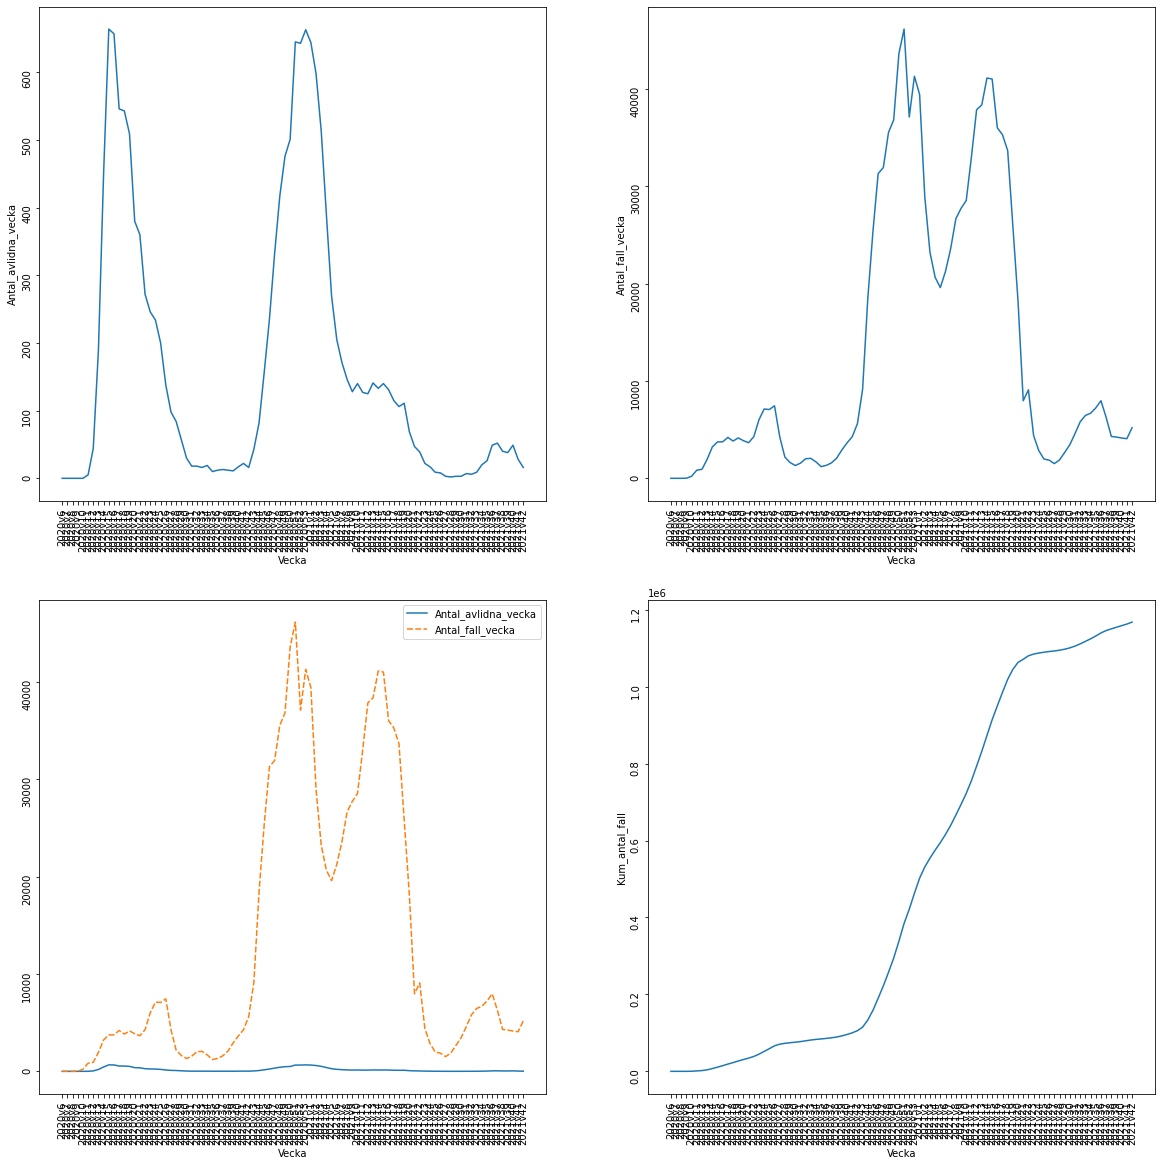

In [144]:
# drawing everything with seaborn

fig, ax = plt.subplots(2,2 , figsize=(20,20))

for i in [0,1]:
    for j in [0,1]:
        ax[i][j].tick_params(rotation=90)

sns.lineplot(ax=ax[0,0], data =covid19 , x="Vecka", y="Antal_avlidna_vecka")
sns.lineplot(ax=ax[0,1], data =covid19 , x="Vecka", y="Antal_fall_vecka")
sns.lineplot(ax=ax[1,0], data =covid19[["Vecka","Antal_avlidna_vecka","Antal_fall_vecka"]].set_index("Vecka",drop=True) )
sns.lineplot(ax=ax[1,1], data =covid19 , x="Vecka", y="Kum_antal_fall")


<AxesSubplot:xlabel='Vecka'>

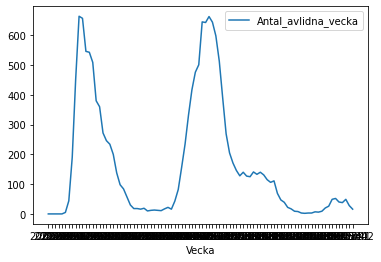

In [151]:
sns.lineplot(data=covid19[["Vecka","Antal_avlidna_vecka"]].set_index("Vecka",drop=True) )

